# Introduction to Natural Language Processing: Assignment 1

In this assignment we'll practice word operations and text classifications.

- Please comment your code
- You can use built-in Python packages, scikit-learn and Pandas.
- Submissions are due **on Tuesdays at 23:59** and should be submitted **ONLY** on eCampus: **Assignmnets >> Student Submissions >> Assignment 1 (Deadline: 05.11.2024, at 23:59)**
- Name the file aproppriately "Assignment_1_\<Your_Name\>.ipynb".
- Please submit **ONLY** the Jupyter Notebook file.
- Please use relative path; Your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = lemmatization-en.txt >> **DON'T use:** /Users/ComputerName/Username/Documents/.../lemmatization-en.txt

### Task 1.1 (2 points)

Write a function `extract_words_tokens(any_string)` that takes a string as input and returns two numbers:
1. num_words: The number of words in string
2. num_tokens: The number of tokens in string (Please use the character-based tokenization.)

**Hint:** The string can be a single word or a sentence and
 can contain some special charecters, such as: "!", ",", ":"

In [1]:
def extract_words_tokens(any_string):
    #here comes your code
    #The num_words is determined by splitting the string on spaces
    #The num_tokens is determined by ounting each character in the string
    words = any_string.split() 
    num_words = len(words)
    num_tokens = len(any_string)
    return(print(any_string, ":", "num_words:", num_words, "and", "num_tokens:", num_tokens, "respectively"))

### Task 1.2 (4 points)

Write a function `lemmatize(any_string, file_name)` that takes as input any string and a file-name: `lemmatization-en.txt` (please download the file [here](https://github.com/michmech/lemmatization-lists/blob/master/lemmatization-en.txt). It's a tab separated corpus) and returns a dictionary with all words as keys and the lemma of the words as values.

**Hint:** To tokenize the string, please use the whitespace as the seperator. The string doesn't contain any special characters.

In [2]:
def lemmatize(any_string, file_name):
    # Load the lemmatization file into a dictionary
    lemmatization_dict = {}
    with open(file_name, 'r') as file:
        for line in file:
            word, lemma = line.strip().split('\t')
            lemmatization_dict[word] = lemma
    
    #Tokenize the input string using whitespace
    words = any_string.split()
    
    #Creating a dictionary with words as keys and their lemmas as values
    dictionary_of_lemmatized_words = {}
    for word in words:
         #Getting the lemma from the dictionary, or the word itself if not found
        lemma = lemmatization_dict.get(word, word)
        dictionary_of_lemmatized_words[word] = lemma
    
    print(dictionary_of_lemmatized_words)
    return dictionary_of_lemmatized_words


In [3]:
lemmatize('18 abase catheterization', "lemmatization-en.txt")

{'18': 'eighteenth', 'abase': 'abasing', 'catheterization': 'catheterizations'}


{'18': 'eighteenth', 'abase': 'abasing', 'catheterization': 'catheterizations'}

### Task 2 (1 point)

Create a DataFrame using the `polarity.txt` file and give name to the columns appropriately. (e.g., "Text", "Label")

In [4]:
#here comes your code
import pandas as pd
def create_dataframe(file_name):
    df = pd.read_csv(file_name, delimiter='\t', header=None, names=["Text", "Label"])
    return df

In [5]:
df = create_dataframe("polarity.txt")
print(df.head())

                                                Text Label
0  every now and then a movie comes along from a ...   pos
1  mtv films' _election , a high school comedy st...   pos
2  did anybody know this film existed a week befo...   pos
3                  the plot is deceptively simple .    pos
4  george washington carver high school is having...   pos


### Task 2.1 (2 point)

Create a new column for the DataFrame that contains labels converted to numerical values instead of strings using the function: `apply()` and drop the original column afterwards.

Hint: The numarical values can be any meaningful values, e.g., pos >> 1 and neg >> 0

In [6]:
# here comes your code
import pandas as pd

def convert_labels_to_numerical(df):
    # Create a new column with numerical values for labels
    df['Label_Numeric'] = df['Label'].apply(lambda x: 1 if x == 'pos' else 0)
    
    # Drop the 'Label' column
    df = df.drop(columns=['Label'])
    
    return df

In [7]:
df = create_dataframe("polarity.txt")
df = convert_labels_to_numerical(df)
print(df.head())

                                                Text  Label_Numeric
0  every now and then a movie comes along from a ...              1
1  mtv films' _election , a high school comedy st...              1
2  did anybody know this film existed a week befo...              1
3                  the plot is deceptively simple .               1
4  george washington carver high school is having...              1


### Task 3 (7 points)

Write a function `create_count_and_probability` that takes a file (`corpus.txt`) as input and returns a csv file as output containing three columns:
1. Text
2. Count_Vector
3. Probability

Example:

For the line: `This document is the second document.`

The row in the csv file should contain:
`This document is the second document.`   `[0,2,0,1,0,1,1,0,1]`   `[1/6, 2/6, 1/6, 1/6, 1/6, 2/6]`

**Note**:

1. You should define your own function and not use e.g., CountVectorizer() which gives you the `count vector`, directly.

2. You can either use the whitespace in `split` as the seperator or use the `Regular Expression (re)` to extract the words, as follows:

```
import re
TEXT = "Hey, - How are you doing today!?"
words_list = re.findall(r"[\w']+", TEXT)
print(words_list)
```

3. To count the words, you can use e.g., the library: `collections`, more specifically `Counter`.

4. Please don't upload the output file. Your function should generate the file.

In [8]:
import re
import csv
from collections import Counter

def create_count_and_probability(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    
    #Building vocabulary 
    vocabulary = set()
    tokenized_lines = []
    for line in lines:
        # Tokenize line using regular expression to match words
        words = re.findall(r"[\w']+", line.lower())
        tokenized_lines.append(words)
        vocabulary.update(words)
    
    #Sort vocabulary to ensure consistent order
    vocabulary = sorted(vocabulary)
    
    #CSV output
    with open("output.csv", mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Text", "Count_Vector", "Probability"])
        
        for i, words in enumerate(tokenized_lines):
            # Count word frequencies in the line
            word_counts = Counter(words)
            total_words = sum(word_counts.values())
            
            # Build count vector and probability vector
            count_vector = [word_counts[word] for word in vocabulary]
            probability_vector = [word_counts[word] / total_words for word in vocabulary]
            
            writer.writerow([lines[i].strip(), count_vector, probability_vector])
    



In [9]:
create_count_and_probability('corpus.txt')

### Task 4 (8 points)

The goal of this task is to train and test classifiers provided in scikit-learn, using two datasets `rural.txt` and `science.txt`.

a) Each file (rural and science) contains sentence-wise documents. You should create a dataframe containing two columns: "Document" and " Class", as shown below. This dataframe will be used later as input for the vectorizer.

|Document                             |Class |
| ------------------------------------|----- |
|PM denies knowledge of AWB kickbacks | rural |
|The crocodile ancestor fossil, found...| science |


b) Remove stop words from the data and create two separate plots showing word frequency for documents in each label.

c) Split the data into train (70%) and test (30%) sets and use the following vectorization techniquess to train the two classifiers provided by scikit-learn:

- one-hot-encoding
- count vectorization

Classifiers:
- naive_bayes.GaussianNB()
- LogisticRegression()

**Hints:**
1. The Gaussian NB Classifier takes a dense matrix as input and the output of the vectorizer is a sparse matrix. Use my_matrix.toarray() for this conversion.
2. You can play around with various parameters in both the count-vectorizer and the classifier to get a better performance in terms of the accuracy. (In the exercise, we will discuss the accuracy of your model.)

In [10]:
#Part a
import pandas as pd

def load_data(rural_file, science_file):
    # Load rural and science data
    with open(rural_file, 'r') as file:
        rural_lines = file.readlines()
    rural_df = pd.DataFrame({'Document': [line.strip() for line in rural_lines], 'Class': 'rural'})
    with open(science_file, 'r') as file:
        science_lines = file.readlines()
    science_df = pd.DataFrame({'Document': [line.strip() for line in science_lines], 'Class': 'science'})

    # Creating a single DataFrame
    df = pd.concat([rural_df, science_df], ignore_index=True)
    return df


In [11]:
df = load_data('rural.txt', 'science.txt')
print(df.head())

                                            Document  Class
0               PM denies knowledge of AWB kickbacks  rural
1  The Prime Minister has denied he knew AWB was ...  rural
2  Letters from John Howard and Deputy Prime Mini...  rural
3  In one of the letters Mr Howard asks AWB manag...  rural
4  The Opposition's Gavan O'Connor says the lette...  rural


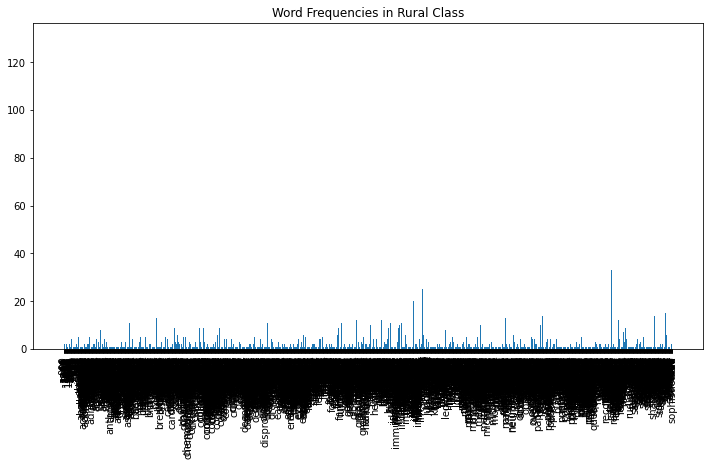

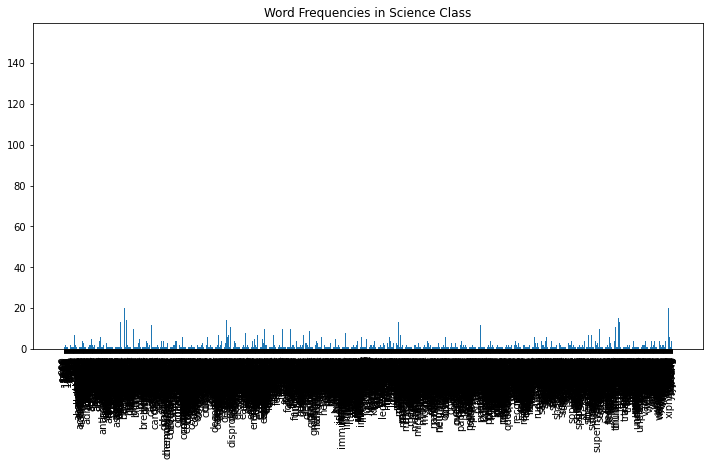

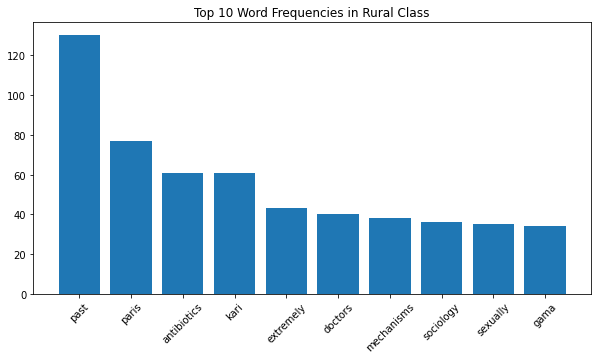

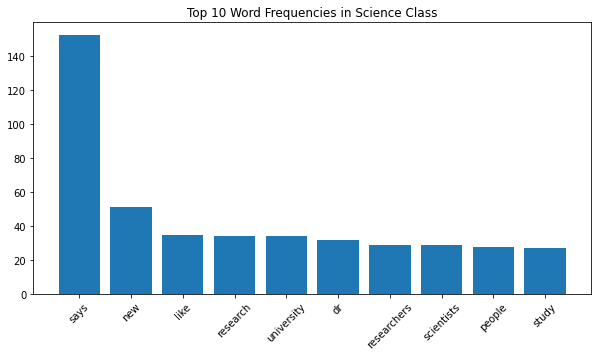

In [12]:
#Part b

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

#Removing stop words of common english words
vectorizer = CountVectorizer(stop_words='english')

rural_docs = df[df['Class'] == 'rural']['Document']
science_docs = df[df['Class'] == 'science']['Document']

# Fit Transform Learns the vocabulary dictionary and return document-term matrix
rural_counts = vectorizer.fit_transform(rural_docs)
science_counts = vectorizer.fit_transform(science_docs)

# Count Frequency 
#Get_Feature_names out() gets output feature names for transformation.
rural_word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), rural_counts.sum(axis=0).tolist()[0])))
science_word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), science_counts.sum(axis=0).tolist()[0])))

#Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(*zip(*rural_word_counts.items()))
plt.title("Word Frequencies in Rural Class")
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(*zip(*science_word_counts.items()))
plt.title("Word Frequencies in Science Class")
plt.xticks(rotation=90)
plt.show()

#Plotting Top 10:

plt.figure(figsize=(10, 5))
plt.bar(*zip(*rural_word_counts.most_common(10)))
plt.title("Top 10 Word Frequencies in Rural Class")
plt.xticks(rotation=45)
plt.show()

# Plotting word frequency for 'science' class
plt.figure(figsize=(10, 5))
plt.bar(*zip(*science_word_counts.most_common(10)))
plt.title("Top 10 Word Frequencies in Science Class")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Part c

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Document'], df['Class'], test_size=0.3, random_state=42)


# One-Hot Encoding
vectorizer_one_hot = CountVectorizer(binary=True, stop_words='english')
X_train_one_hot = vectorizer_one_hot.fit_transform(X_train).toarray()
X_test_one_hot = vectorizer_one_hot.transform(X_test).toarray()

# Count Vectorization
vectorizer_count = CountVectorizer(stop_words='english')
X_train_count = vectorizer_count.fit_transform(X_train).toarray()
X_test_count = vectorizer_count.transform(X_test).toarray()

# GaussianNB Classfier
guassnb = GaussianNB()

# Train With One-Hot Encoder and Evaluate it For GuassianNB
guassnb.fit(X_train_one_hot, y_train)
y_pred_guassnb_one_hot = guassnb.predict(X_test_one_hot)
accuracy_gnb_one_hot = accuracy_score(y_test, y_pred_guassnb_one_hot)

# Train With Count Vectorization and Evaluate it For GuassianNB
guassnb.fit(X_train_count, y_train)
y_pred_guassnb_count = guassnb.predict(X_test_count)
accuracy_gnb_count = accuracy_score(y_test, y_pred_guassnb_count)

# Classifier: LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Train  With One-Hot Encoder and Evaluate it For Logistic Regression
logreg.fit(X_train_one_hot, y_train)
y_pred_logreg_one_hot = logreg.predict(X_test_one_hot)
accuracy_logreg_one_hot = accuracy_score(y_test, y_pred_logreg_one_hot)

# Train With Count Vectorization and Evaluate it For Logistic Regression
guassnb.fit(X_train_count, y_train)
logreg.fit(X_train_count, y_train)
y_pred_logreg_count = logreg.predict(X_test_count)
accuracy_logreg_count = accuracy_score(y_test, y_pred_logreg_count)

# Print accuracies
print("Accuracy of GaussianNB with One-Hot Encoding:", accuracy_gnb_one_hot)
print("Accuracy of GaussianNB with Count Vectorization:", accuracy_gnb_count)
print("Accuracy of Logistic Regression with One-Hot Encoding:", accuracy_logreg_one_hot)
print("Accuracy of Logistic Regression with Count Vectorization:", accuracy_logreg_count)


Accuracy of GaussianNB with One-Hot Encoding: 0.9169139465875371
Accuracy of GaussianNB with Count Vectorization: 0.9109792284866469
Accuracy of Logistic Regression with One-Hot Encoding: 0.8931750741839762
Accuracy of Logistic Regression with Count Vectorization: 0.8902077151335311
